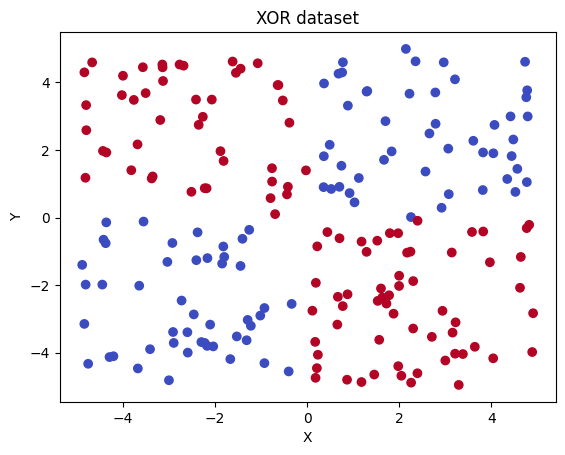

In [78]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate XOR dataset
np.random.seed(0)
X_train = np.random.rand(200, 2) * 10 - 5
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)

X_test = np.random.rand(200, 2) * 10 - 5
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int)

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('XOR dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 5)                 15        
                                                                 
 dense_126 (Dense)           (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step


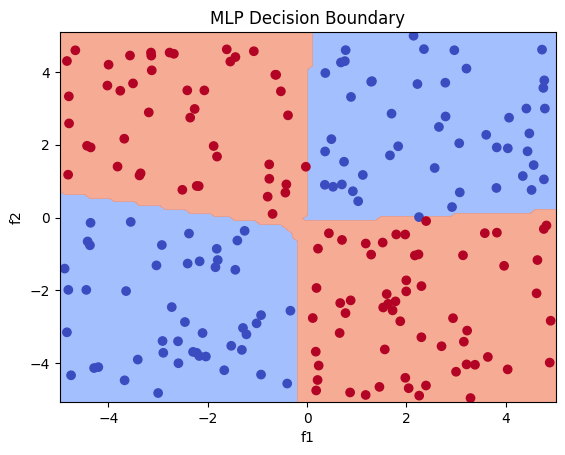

Accuracy: 0.9750000238418579


In [69]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define learning rate scheduler function
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

# Define MLP model
def create_mlp_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)  # Initial learning rate, will be overwritten by lr_scheduler
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train MLP model with learning rate scheduler
mlp_model = create_mlp_model()
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
mlp_history = mlp_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0, callbacks=[lr_callback])
mlp_model.summary()

# Plot decision boundary for MLP
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = mlp_model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('MLP Decision Boundary')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()


val_acc = mlp_history.history['val_accuracy'][-1]
print("Accuracy:", val_acc)

313/313 [==============================] - 0s 1ms/step


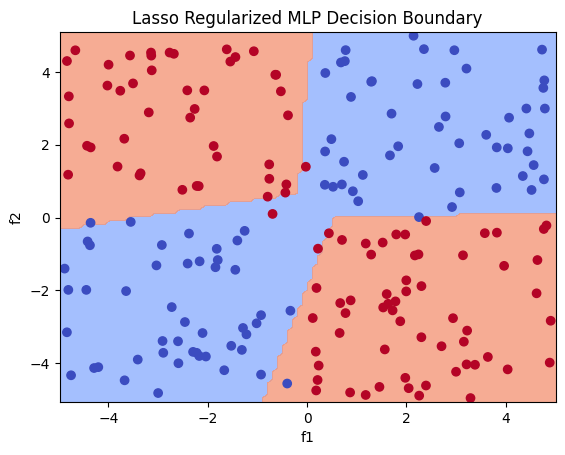

Accuracy: 0.9300000071525574


In [84]:
import tensorflow as tf
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

def create_mlp_model(l1_reg):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l1(l1_reg), input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)  # Initial learning rate, will be overwritten by lr_scheduler
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import train_test_split

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

l1_values = [0.0001, 0.001, 0.01, 0.1]

best_l1 = None
best_val_acc = 0.0
for l1 in l1_values:
    model = create_mlp_model(l1_reg=l1)
    lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
    history = model.fit(X_train2, y_train2, epochs=100, validation_data=(X_val, y_val), verbose=0, callbacks=[lr_callback])
    val_acc = history.history['val_accuracy'][-1]
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_l1 = l1

final_model = create_mlp_model(l1_reg=best_l1)
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
final_history = final_model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[lr_callback])

final_loss, final_acc = final_model.evaluate(X_test, y_test)

x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = final_model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('Lasso Regularized MLP Decision Boundary')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()


print("Accuracy:", final_acc)

313/313 [==============================] - 0s 1ms/step


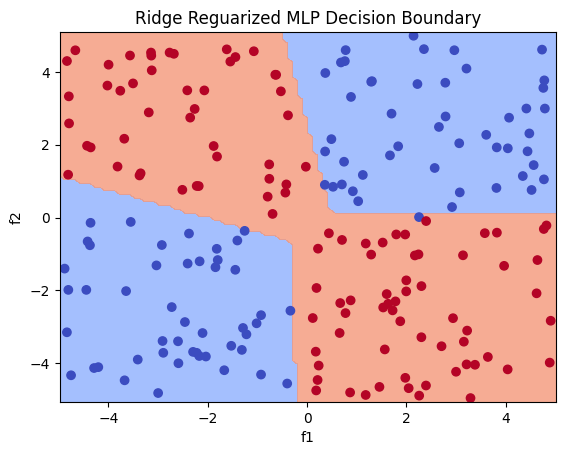

7/7 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 0.9800
Accuracy: 0.9800000190734863


In [83]:
import tensorflow as tf
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

def create_mlp_model(l1_reg):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(l1_reg), input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)  # Initial learning rate, will be overwritten by lr_scheduler
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import train_test_split

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

l1_values = [0.0001, 0.001, 0.01, 0.1]

best_l1 = None
best_val_acc = 0.0
for l1 in l1_values:
    model = create_mlp_model(l1_reg=l1)
    lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
    history = model.fit(X_train2, y_train2, epochs=100, validation_data=(X_val, y_val), verbose=0, callbacks=[lr_callback])
    val_acc = history.history['val_accuracy'][-1]
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_l1 = l1

final_model = create_mlp_model(l1_reg=best_l1)
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
final_history = final_model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[lr_callback])

x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = final_model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('Ridge Reguarized MLP Decision Boundary')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

final_loss, final_acc = final_model.evaluate(X_test, y_test)
print("Accuracy:", final_acc)


313/313 [==============================] - 1s 3ms/step


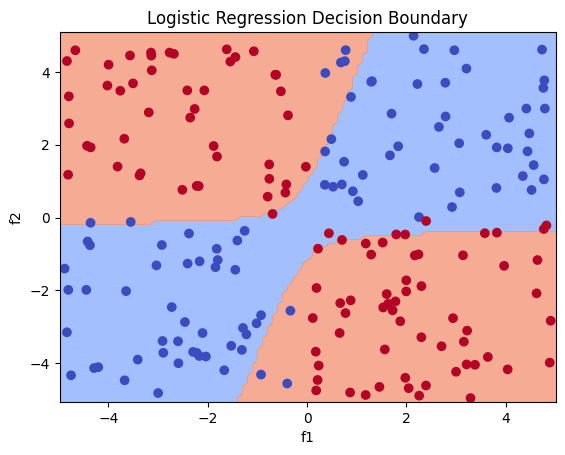

7/7 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.9200
Accuracy: 0.9200000166893005


In [79]:
x1 = X_train[:, 0]
x2 = X_train[:, 1]

x3 = x1 * x2
x4 = x1 ** 2
x5 = x2 ** 2

X_train_feature_rich = np.column_stack((x1, x2, x3, x4, x5))

x1 = X_test[:, 0]
x2 = X_test[:, 1]

x3 = x1 * x2
x4 = x1 ** 2
x5 = x2 ** 2

X_test_feature_rich = np.column_stack((x1, x2, x3, x4, x5))


model = keras.Sequential([
  keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train_feature_rich.shape[1],))
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train_feature_rich, y_train, epochs=100, verbose = 0)

y_pred = model.predict(X_test_feature_rich)


x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
x3_mesh = xx.ravel() * yy.ravel()
x4_mesh = xx.ravel() ** 2
x5_mesh = yy.ravel() ** 2

# Stack the new features horizontally
X_mesh = np.column_stack((xx.ravel(), yy.ravel(), x3_mesh, x4_mesh, x5_mesh))

# Predict using the model
Z = model.predict(X_mesh) > 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()


final_loss, final_acc = model.evaluate(X_test_feature_rich, y_test)
print("Accuracy:", final_acc)